In [12]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from Usain import *
import sys
sys.path.append('..')
from CurvatureTools import *
from CubicSpline import *
#%matplotlib qt

    Add a positive offset to the scaled velocity before integration so the pitch isn't below our hearing range at the beginning

	Try different bases for the exponent other than 2 when you scale the velocity

    Work to obtain the unscaled velocity by adding a constant to the acceleration to bring it above 0, and then do the cumulative sum

    Work on getting that video off of youtube and syncing it up

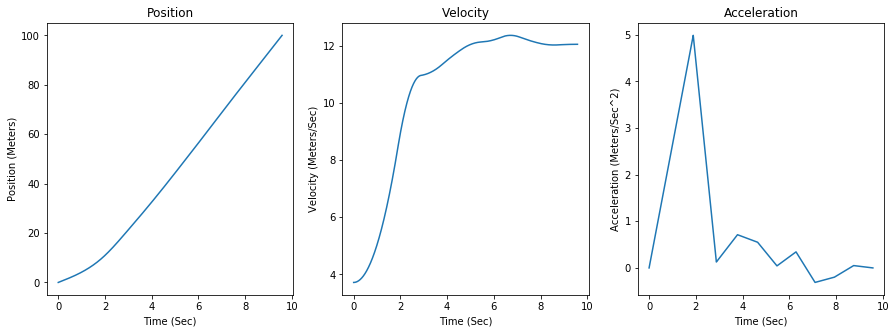

In [13]:
xs = np.array([0, 1.89, 2.88, 3.78, 4.64, 5.47, 6.29, 7.1, 7.92, 8.75, 9.58])
ys = np.arange(11)*10
t = np.linspace(0, 9.58, int(44100*9.58)) # How to sample
[position, velocity, acceleration] = sample_cubic_spline(xs, ys, t)

fs = 44100
arrl = t[-1]

v = velocity
p = position
a = acceleration

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(t, position)
plt.xlabel("Time (Sec)")
plt.ylabel("Position (Meters)")
plt.title("Position")

plt.subplot(132)
plt.plot(t, velocity)
plt.xlabel("Time (Sec)")
plt.ylabel("Velocity (Meters/Sec)")
plt.title("Velocity")

plt.subplot(133)
plt.plot(t, acceleration)
plt.xlabel("Time (Sec)")
plt.ylabel("Acceleration (Meters/Sec^2)")
plt.title("Acceleration")

plt.show()

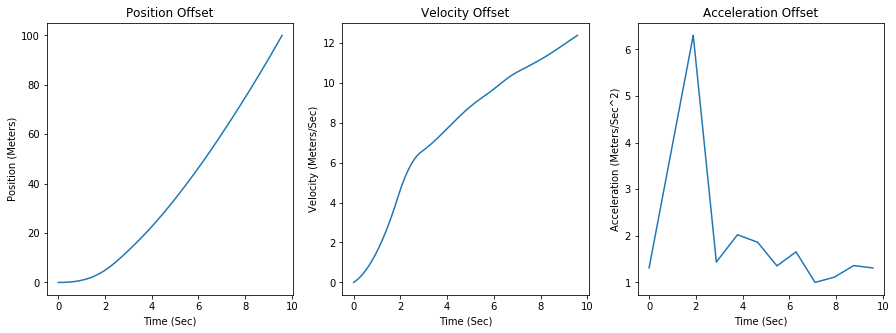

In [14]:
#offset acceleration

extraoffset = 1

OA = a - np.min(a) + extraoffset
OA = np.reshape(OA,(1,len(OA)))

VN = np.cumsum(OA, axis=1)/fs
PN = np.cumsum(VN, axis=1)/fs

AN = OA.flatten()
VN = VN.flatten()
PN = PN.flatten()

vm = np.max(v)
vnm = np.max(VN)
scale = vm/vnm
VN *= scale

pm = np.max(p)
pnm = np.max(PN)
scale = pm/pnm
PN *= scale

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(t, PN)
plt.xlabel("Time (Sec)")
plt.ylabel("Position (Meters)")
plt.title("Position Offset")

plt.subplot(132)
plt.plot(t, VN)
plt.xlabel("Time (Sec)")
plt.ylabel("Velocity (Meters/Sec)")
plt.title("Velocity Offset")

plt.subplot(133)
plt.plot(t, AN)
plt.xlabel("Time (Sec)")
plt.ylabel("Acceleration (Meters/Sec^2)")
plt.title("Acceleration Offset")

plt.show()

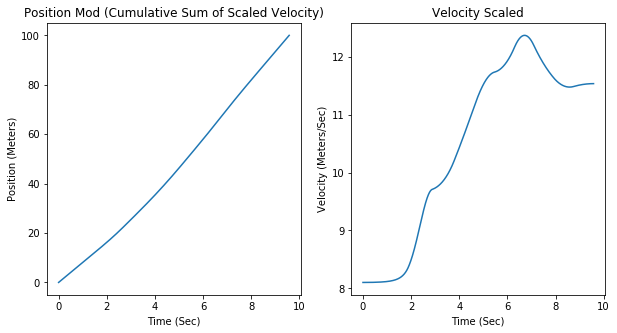

In [21]:
#scaled velocity and position
vscale = 2**v
vscale += 10000
vscale = np.reshape(vscale,(1,len(vscale)))
vcumsum = np.cumsum(vscale, axis=0)/fs

pcumsum = np.cumsum(vcumsum, axis=1)
pnew = pcumsum.flatten()
vnew = vcumsum.flatten()

vmax = np.max(v)
vnewmax = np.max(vnew)
scale = vmax/vnewmax
vnew *= scale

pmax = np.max(p)
pnewmax = np.max(pnew)
scale = pmax/pnewmax
pnew *= scale

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(t, pnew)
plt.xlabel("Time (Sec)")
plt.ylabel("Position (Meters)")
plt.title("Position Mod (Cumulative Sum of Scaled Velocity)")

plt.subplot(122)
plt.plot(t, vnew)
plt.xlabel("Time (Sec)")
plt.ylabel("Velocity (Meters/Sec)")
plt.title("Velocity Scaled")

plt.show()

In [37]:
freq = 100
freqscale = 4

#position audio
PAud = create_chords(freqscale, freq, position, acceleration, arrl, 0)

#pnew audio
PNAud = create_chords(freqscale, freq, pnew, acceleration, arrl, 0)

#PN audio
POAud = create_chords(freqscale, freq, PN, AN, arrl, 0)

#velocity audio
VAud = create_chords(freqscale, freq, velocity, acceleration, arrl, 1)

#vnew audio
VNAud = create_chords(freqscale, freq, vnew, acceleration, arrl, 1)

#VN audio
VOAud = create_chords(freqscale, freq, VN, AN, arrl, 1)

In [38]:
#position audio
ipd.Audio(PAud, rate = fs)

In [39]:
#scaled position audio
ipd.Audio(PNAud, rate = fs)

In [40]:
#offset position audio
ipd.Audio(POAud, rate = fs)

In [41]:
#velocity audio
ipd.Audio(VAud, rate = fs)

In [42]:
#scaled velocity audio
ipd.Audio(VNAud, rate = fs)

In [43]:
#offset velocity audio
ipd.Audio(VOAud, rate = fs)